In [1]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import time

import qiskit
from qiskit.quantum_info import Pauli
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms import NumPyEigensolver
from qiskit.circuit.library import EvolvedOperatorAnsatz

import sys
sys.path.append('../utility')
from vqe_run import *
from qc_ansatze import *

In [2]:
def open_n_process(file_link):
    file = open(file_link, "r")
    content = file.read()

    data = content.split(',\n')
    data[0] = data[0].split('\n')[1]
    data[-1] = data[-1].split('\n')[0]

    data_coeff = []
    data_str = []
    for i in range(len(data)):
        data_coeff.append(float(data[i].split('*')[0]))
        data_str.append(data[i].split('*')[1].split(' ')[1])
    return data_coeff, data_str
    
def check_min_max(data_coeff):
    print(f'Min absolute value is {np.round(np.min(np.abs(data_coeff[1:])),6)}')
    print(f'Max absolute value is {np.round(np.max(np.abs(data_coeff[1:])),5)}')
    print(f'Mean absolute value is {np.round(np.mean(np.abs(data_coeff[1:])),5)}')

In [3]:
def get_k_largest_ops(data_coeff, data_str, k):
    ind_list = np.argsort(np.abs(data_coeff[1:]))[-k:]
    ops = [data_str[1:][i] for i in ind_list]
    val= [np.round(data_coeff[1:][i],4) for i in ind_list]
    return ind_list, ops, val

# L=0.2

In [4]:
data_coeff_02, data_str_02 = open_n_process("../utility/pauliH_L4_g0.2.txt")
Hpauli = list(zip(data_str_02, data_coeff_02))
H4q_02 = SparsePauliOp.from_list(Hpauli)
# exactly diagonalize the system using numpy routines
solver = NumPyEigensolver(k=4)
exact_solution = solver.compute_eigenvalues(H4q_02)
#print("Exact Result of qubit hamiltonian:", np.real(exact_solution.eigenvalues))
E_exact = np.round(np.real(exact_solution.eigenvalues)[0],5)
print(f'{check_min_max(data_coeff_02)}')
print(f'E_exact = {E_exact}')

Min absolute value is 0.000897
Max absolute value is 1.15
Mean absolute value is 0.03431
None
E_exact = 3.13406


In [5]:
ind20_02, ops20_02, vals20_02 = get_k_largest_ops(data_coeff_02, data_str_02, 20)
ind30_02, ops30_02, vals30_02 = get_k_largest_ops(data_coeff_02, data_str_02, 30)
ind40_02, ops40_02, vals40_02 = get_k_largest_ops(data_coeff_02, data_str_02, 40)

In [7]:
df02_20 = pd.DataFrame({'op_index': ind20_02, 'ops_names': ops20_02, 'op_vals': vals20_02})
df02_20.to_csv('l02_ops_20_list.csv')
df02_20

,op_index,ops_names,op_vals
0,510,IIIXIXIIIXIX,-0.1741
1,382,IXIIIXIXIIIX,-0.1741
2,72,IIIIIIXIIIII,0.2898
3,90,IIIIIIIIXIII,0.2898
4,364,IIIIIIIIIIXI,0.2898
5,42,XIIIIIIIIIII,0.2898
6,62,IIIIXIIIIIII,0.2898
7,52,IIXIIIIIIIII,0.2898
8,36,IIIIIIIIIIIZ,-0.5000
9,1,IZIIIIIIIIII,-0.5000


In [9]:
df02 = pd.DataFrame({'op_index': ind40_02, 'ops_names': ops40_02, 'op_vals': vals40_02})
df02.to_csv('l02_ops_40_list.csv')

# L=0.5

In [10]:
data_coeff_05, data_str_05 = open_n_process("../utility/pauliH_L4_g0.5.txt")
Hpauli = list(zip(data_str_05, data_coeff_05))
H4q_05 = SparsePauliOp.from_list(Hpauli)
# exactly diagonalize the system using numpy routines
solver = NumPyEigensolver(k=4)
exact_solution = solver.compute_eigenvalues(H4q_05)
#print("Exact Result of qubit hamiltonian:", np.real(exact_solution.eigenvalues))
E_exact = np.round(np.real(exact_solution.eigenvalues)[0],5)
print(f'{check_min_max(data_coeff_05)}')
print(f'E_exact = {E_exact}')

Min absolute value is 0.002244
Max absolute value is 1.375
Mean absolute value is 0.07067
None
E_exact = 3.29894


In [11]:
ind20_05, ops20_05, vals20_05 = get_k_largest_ops(data_coeff_05, data_str_05, 20)
ind30_05, ops30_05, vals30_05 = get_k_largest_ops(data_coeff_05, data_str_05, 30)
ind40_05, ops40_05, vals40_05 = get_k_largest_ops(data_coeff_05, data_str_05, 40)

In [12]:
df05_20 = pd.DataFrame({'op_index': ind20_05, 'ops_names': ops20_05, 'op_vals': vals20_05})
df05_20.to_csv('l05_ops_20_list.csv')
df05_20

,op_index,ops_names,op_vals
0,510,IIIXIXIIIXIX,-0.4353
1,382,IXIIIXIXIIIX,-0.4353
2,36,IIIIIIIIIIIZ,-0.5000
3,1,IZIIIIIIIIII,-0.5000
4,25,IIIIIIIIIZII,-0.5000
5,14,IIIIIIIZIIII,-0.5000
6,7,IIIIIZIIIIII,-0.5000
7,4,IIIZIIIIIIII,-0.5000
8,42,XIIIIIIIIIII,0.7244
9,62,IIIIXIIIIIII,0.7244


In [13]:
df05 = pd.DataFrame({'op_index': ind40_05, 'ops_names': ops40_05, 'op_vals': vals40_05})
df05.to_csv('l05_ops_40_list.csv')
#df05

# L=1.0

In [14]:
data_coeff_10, data_str_10 = open_n_process("../utility/pauliH_L4_g1.0.txt")
Hpauli = list(zip(data_str_10, data_coeff_10))
H4q_10 = SparsePauliOp.from_list(Hpauli)
# exactly diagonalize the system using numpy routines
solver = NumPyEigensolver(k=4)
exact_solution = solver.compute_eigenvalues(H4q_10)
#print("Exact Result of qubit hamiltonian:", np.real(exact_solution.eigenvalues))
E_exact = np.round(np.real(exact_solution.eigenvalues)[0],5)
print(f'{check_min_max(data_coeff_10)}')
print(f'E_exact = {E_exact}')

Min absolute value is 0.004487
Max absolute value is 1.75
Mean absolute value is 0.13128
None
E_exact = 3.52625


In [15]:
ind20_10, ops20_10, vals20_10 = get_k_largest_ops(data_coeff_10, data_str_10, 20)
ind30_10, ops30_10, vals30_10 = get_k_largest_ops(data_coeff_10, data_str_10, 30)
ind40_10, ops40_10, vals40_10 = get_k_largest_ops(data_coeff_10, data_str_10, 40)

In [16]:
df10_20 = pd.DataFrame({'op_index': ind20_10, 'ops_names': ops20_10, 'op_vals': vals20_10})
df10_20.to_csv('l10_ops_20_list.csv')
df10_20

,op_index,ops_names,op_vals
0,8,IIIIZZIIIIII,-0.7500
1,15,IIIIIIZZIIII,-0.7500
2,37,IIIIIIIIIIZZ,-0.7500
3,2,ZZIIIIIIIIII,-0.7500
4,26,IIIIIIIIZZII,-0.7500
5,108,IXIXIIIXIXII,-0.8705
6,382,IXIIIXIXIIIX,-0.8705
7,510,IIIXIXIIIXIX,-0.8705
8,42,XIIIIIIIIIII,1.4489
9,52,IIXIIIIIIIII,1.4489


In [17]:
df10 = pd.DataFrame({'op_index': ind40_10, 'ops_names': ops40_10, 'op_vals': vals40_10})
df10.to_csv('l10_ops_40_list.csv')
#df10

# L=2.0

In [18]:
data_coeff_20, data_str_20 = open_n_process("../utility/pauliH_L4_g2.0.txt")
Hpauli = list(zip(data_str_20, data_coeff_20))
H4q_20 = SparsePauliOp.from_list(Hpauli)
# exactly diagonalize the system using numpy routines
solver = NumPyEigensolver(k=4)
exact_solution = solver.compute_eigenvalues(H4q_20)
#print("Exact Result of qubit hamiltonian:", np.real(exact_solution.eigenvalues))
E_exact = np.round(np.real(exact_solution.eigenvalues)[0],5)
print(f'{check_min_max(data_coeff_20)}')
print(f'E_exact = {E_exact}')

Min absolute value is 0.008975
Max absolute value is 2.89778
Mean absolute value is 0.25249
None
E_exact = 3.89548


In [19]:
ind20_20, ops20_20, vals20_20 = get_k_largest_ops(data_coeff_20, data_str_20, 20)
ind30_20, ops30_20, vals30_20 = get_k_largest_ops(data_coeff_20, data_str_20, 30)
ind40_20, ops40_20, vals40_20 = get_k_largest_ops(data_coeff_20, data_str_20, 40)

In [20]:
df20_20 = pd.DataFrame({'op_index': ind20_20, 'ops_names': ops20_20, 'op_vals': vals20_20})
df20_20.to_csv('l20_ops_20_list.csv')
df20_20

,op_index,ops_names,op_vals
0,5,IIZZIIIIIIII,-1.5000
1,8,IIIIZZIIIIII,-1.5000
2,37,IIIIIIIIIIZZ,-1.5000
3,26,IIIIIIIIZZII,-1.5000
4,15,IIIIIIZZIIII,-1.5000
5,108,IXIXIIIXIXII,-1.7410
6,382,IXIIIXIXIIIX,-1.7410
7,510,IIIXIXIIIXIX,-1.7410
8,3,IIZIIIIIIIII,-2.5000
9,6,IIIIZIIIIIII,-2.5000


In [21]:
df20 = pd.DataFrame({'op_index': ind40_20, 'ops_names': ops40_20, 'op_vals': vals40_20})
df20.to_csv('l20_ops_40_list.csv')
#df20

# Plotting

In [19]:
print(f'List of l=0.2 indices:\n {ind40_02}')
print(f'List of l=0.5 indices:\n {ind40_05}')
print(f'List of l=1.0 indices:\n {ind40_10}')
print(f'List of l=2.0 indices:\n {ind40_20}')

List of l=0.2 indices:
 [544 574 578 638 646 416 124  82  86 100 104 374 378  26  15   5   2   8
  37 108 510 382  72  90 364  42  62  52  36   1  25  14   7   4   3   0
   6  20  31   9]
List of l=0.5 indices:
 [544 574 578 638 646 416 124  82  86 100 104 374 378  26  15   5   2   8
  37 108 510 382  36   1  25  14   7   4  42  62  52  72  90 364   3   9
  20  31   6   0]
List of l=1.0 indices:
 [578 574 544 542 527 638 526  82 100 104  86 378 374   1  25   4   7  14
  36   5   8  15  37   2  26 108 382 510  42  52  62  72  90 364  20   9
   6   3  31   0]
List of l=2.0 indices:
 [399 414 140 450 416 646 526 527 542 544 574 578 638  82 100 104  86 374
 378   2   5   8  37  26  15 108 382 510   3   6   9  31  20   0  42  52
  62 364  72  90]


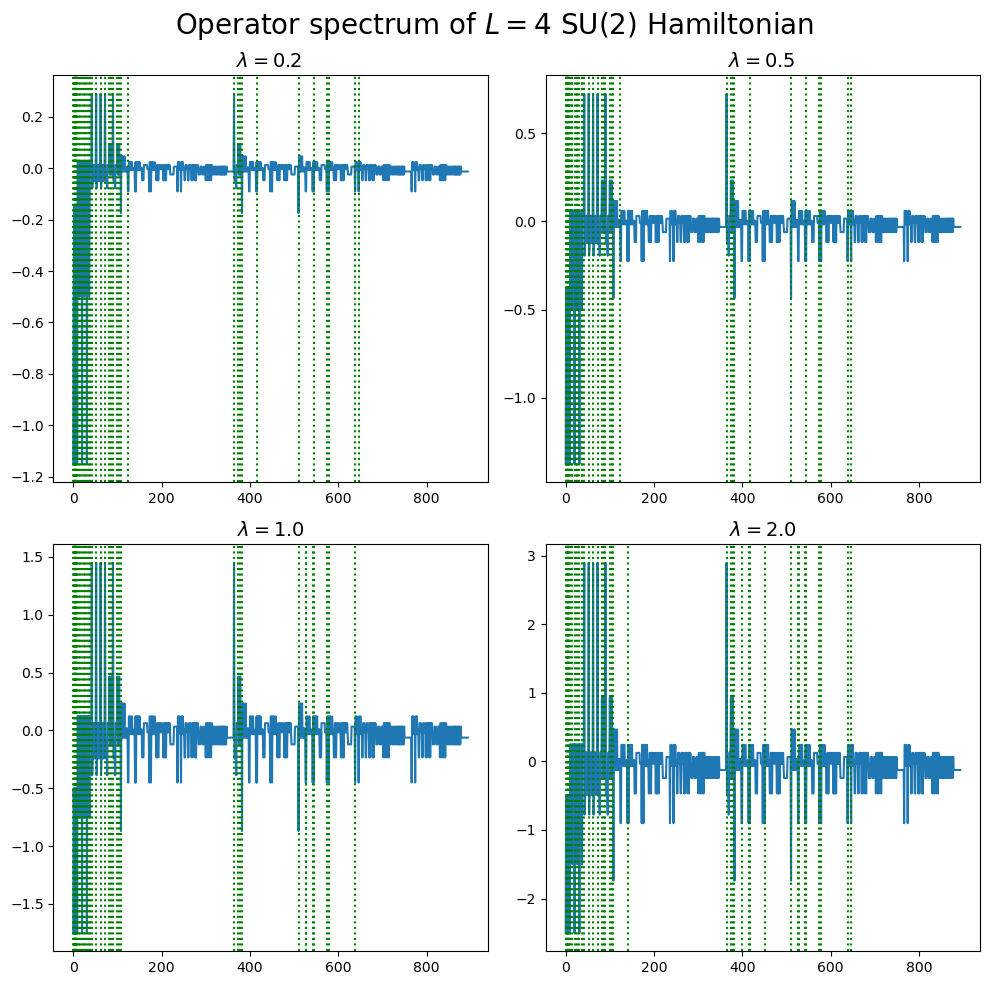

In [21]:
fig, ax = plt.subplots(2,2, figsize = (10,10), tight_layout=True)
ax[0,0].plot(data_coeff_02[1:])
for i in range(len(ind40_02)):
    ax[0,0].axvline(x=ind40_02[i], color = 'green', linestyle='dotted')
ax[0,0].set_title('$\lambda=0.2$ ', fontsize=14)

ax[0,1].plot(data_coeff_05[1:])
for i in range(len(ind40_05)):
    ax[0,1].axvline(x=ind40_05[i], color = 'green', linestyle='dotted')
ax[0,1].set_title('$\lambda=0.5$ ', fontsize=14)

ax[1,0].plot(data_coeff_10[1:])
for i in range(len(ind40_10)):
    ax[1,0].axvline(x=ind40_10[i], color = 'green', linestyle='dotted')
ax[1,0].set_title('$\lambda=1.0$', fontsize=14)

ax[1,1].plot(data_coeff_20[1:])
for i in range(len(ind40_20)):
    ax[1,1].axvline(x=ind40_20[i], color = 'green', linestyle='dotted')
ax[1,1].set_title('$\lambda=2.0$', fontsize=14)

fig.suptitle('Operator spectrum of $L=4$ SU(2) Hamiltonian', fontsize = 20)
plt.savefig('L4_ops_spectrum.png')